### COP Data

fitting curve 

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from array import *
import plotly.graph_objects as go
import plotly.express as px
import numpy as np


from glob import glob

In [28]:
    
def to_C(F):
    C = (F-32) * (5/9)
    return (C)

In [29]:
# Data taken from SANDEN tests run on their SANCO2 highly efficient heat pumps
T = [-13, -4, 5, 14, 23, 32, 41, 50, 59, 68, 77, 86, 95, 104]
cop_140F = [1.7, 2.0, 2.2, 2.5, 2.9, 3.2, 3.9, 4.7, 4.8, 5.2, 5.0, 4.6, 4.3, 4.0]
cop_150F = [1.7, 1.9, 2.2, 2.6, 3.0, 3.4, 3.9, 4.3, 4.5, 4.8, 4.6, 4.4, 4.2, 4.1]
cop_160F = [1.5, 1.9, 2.1, 2.5, 2.9, 3.3, 3.7, 4.0, 4.2, 4.3, 4.3, 4.2, 4.1, 4.0]

df = pd.DataFrame(list(zip(T, cop_140F, cop_150F, cop_160F)), 
                  columns = ['ambient_F', '140F', '150F', '160F'])

df['ambient_C'] = to_C(df['ambient_F'])

fig = go.Figure()


fig.add_trace(go.Scatter(x = df['ambient_C'].tolist(), y = cop_140F, name = '140F SET TEMP'))
fig.add_trace(go.Scatter(x = df['ambient_C'].tolist(), y = cop_150F, name = '150F SET TEMP'))
fig.add_trace(go.Scatter(x = df['ambient_C'].tolist(), y = cop_160F, name = '160F SET TEMP'))

fig.add_annotation(y=max(cop_140F), x = 20, text = 'COP 5.2')

fig.update_layout(title='HEAT PUMP COP w.r.t AMBIENT TEMPERATURE')
fig.layout.xaxis.title = 'Outside Temperature [F]'
fig.layout.yaxis.title = 'COP'

fig.show()

[ 3.39494506e+00  5.86593406e-02 -1.03296703e-03]


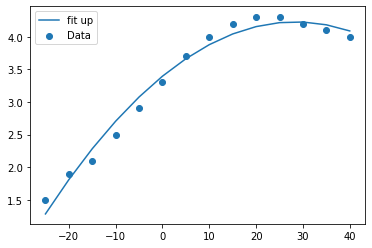

In [48]:
# in the interest of learning, let's figure this out. here's a straight line fit

# now I have my data, should fit it to a curve. 


def func(x, a, b, c):
    return (a + (b*np.array(x)) + (c*(np.array(x)**2)))
    # form y = a + bx + cx^2

xdata = df['ambient_C'].tolist()
ydata = df['160F'].tolist()

params, params_covariance = optimize.curve_fit(func, xdata, ydata, p0=[100,20, 10])

print(params)

plt.figure(figsize=(6,4))

plt.scatter(xdata, ydata, label ='Data')
plt.plot(xdata, func(xdata, params[0], params[1], params[2]), label = 'fit up')

plt.legend(loc='best')

plt.show()

# close enough. 

In [49]:
import joblib
model = joblib.load('./copfit.joblib')
cops = model.predict(tmp.to_numpy().reshape(-1,1))

/Users/voncronic/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator KernelRidge from version 0.22 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.



NameError: name 'tmp' is not defined

4.15494505470541
